In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [72]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [73]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [74]:
numeric = ['LoanAmount', 'CoapplicantIncome', 'ApplicantIncome']
category = ['Property_Area', 'Credit_History' ,'Loan_Amount_Term', 'Self_Employed', 'Education', 'Dependents', 'Married', 'Gender']

In [75]:
"""""for i in category:
    train_data[i] = train_data[i].astype('category')
    test_data[i] = test_data[i].astype('category')

train_data['Loan_Status'] = train_data['Loan_Status'].astype('category')"""

'""for i in category:\n    train_data[i] = train_data[i].astype(\'category\')\n    test_data[i] = test_data[i].astype(\'category\')\n\ntrain_data[\'Loan_Status\'] = train_data[\'Loan_Status\'].astype(\'category\')'

In [76]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [77]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [78]:
# Filling Null values
#train_data['Gender'] = train_data['Gender'].cat.add_categories('No Gender')
train_data['Gender'].fillna('No Gender',inplace = True)
#test_data['Gender'] = test_data['Gender'].cat.add_categories('No Gender')
test_data['Gender'].fillna('No Gender',inplace = True)

#train_data['Married'] = train_data['Married'].cat.add_categories('No Data')
train_data['Married'].fillna('No Data',inplace = True)

#train_data['Dependents'] = train_data['Dependents'].cat.add_categories('No Data')
train_data['Dependents'].fillna('No data',inplace = True)
#test_data['Dependents'] = test_data['Dependents'].cat.add_categories('No Data')
test_data['Dependents'].fillna('No data',inplace = True)

#train_data['Self_Employed'] = train_data['Self_Employed'].cat.add_categories('No Data')
train_data['Self_Employed'].fillna('No Data',inplace = True)
#test_data['Self_Employed'] = test_data['Self_Employed'].cat.add_categories('No Data')
test_data['Self_Employed'].fillna('No Data',inplace = True)

#train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].cat.add_categories('No Data')
train_data['Loan_Amount_Term'].fillna(-999,inplace = True)
#test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term'].cat.add_categories('No Data')
test_data['Loan_Amount_Term'].fillna(-999,inplace = True)

#train_data['Credit_History'] = train_data['Credit_History'].cat.add_categories('No Data')
train_data['Credit_History'].fillna(-999,inplace = True)
#test_data['Credit_History'] = test_data['Credit_History'].cat.add_categories('No Data')
test_data['Credit_History'].fillna(-999,inplace = True)

train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(),inplace = True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(),inplace = True)



In [79]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [80]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [81]:
# Scaling
scaler = StandardScaler()
for i in numeric:
    train_data[i] = scaler.fit_transform(train_data[i].values.reshape(-1,1))
    test_data[i] = scaler.fit_transform(test_data[i].values.reshape(-1,1))

In [82]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.072991,-0.554487,-0.211241,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,-0.134412,-0.038732,-0.211241,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,-0.393747,-0.554487,-0.948996,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,-0.462062,0.251980,-0.306435,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.097728,-0.554487,-0.056551,360.0,1.0,Urban,Y


In [83]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,0.186461,-0.673335,-0.426780,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,-0.352692,-0.029848,-0.163953,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,0.039641,0.098849,1.183033,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,-0.502774,0.418877,-0.591047,360.0,-999.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,-0.311909,-0.673335,-0.952433,360.0,1.0,Urban


In [84]:
train_data['Dependents'].value_counts()

0          345
1          102
2          101
3+          51
No data     15
Name: Dependents, dtype: int64

In [85]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [86]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_enc1= train_data[category]
data_enc2 = test_data[category]

X1 = data_enc1.apply(le.fit_transform)
X2 = data_enc2.apply(le.fit_transform)

In [87]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X1)
onehotlabel_tr = enc.transform(X1).toarray()
onehotlabel_test = enc.transform(X2).toarray()

In [88]:
df1 = pd.DataFrame(data=onehotlabel_tr)
df2 = pd.DataFrame(data=onehotlabel_test)

In [89]:
for i in category:
    train_data.drop(i, axis=1, inplace=True)
    test_data.drop(i, axis=1, inplace=True)

train_data = pd.concat([train_data, df1], axis=1)
test_data = pd.concat([test_data, df2], axis=1)

In [90]:
#droping Loan_ID
train_data.drop('Loan_ID', axis=1, inplace=True)
Loan_ID = test_data['Loan_ID']
test_data.drop('Loan_ID', axis=1, inplace=True)

In [93]:
status = {'N':0, 'Y':1}
train_data['Loan_Status'] = train_data['Loan_Status'].map(status)

In [94]:
train_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,0,1,2,3,4,5,...,23,24,25,26,27,28,29,30,31,32
0,0.072991,-0.554487,-0.211241,1,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.134412,-0.038732,-0.211241,0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.393747,-0.554487,-0.948996,1,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.462062,0.251980,-0.306435,1,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.097728,-0.554487,-0.056551,1,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [95]:
test_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,0,1,2,3,4,5,6,...,23,24,25,26,27,28,29,30,31,32
0,0.186461,-0.673335,-0.426780,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.352692,-0.029848,-0.163953,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.039641,0.098849,1.183033,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.502774,0.418877,-0.591047,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.311909,-0.673335,-0.952433,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [98]:
# train test split
X = train_data.drop("Loan_Status",axis=1)
Y = train_data["Loan_Status"]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42, stratify = Y)

In [99]:
def KNN_tune(X_tr,y_tr,X_cv,y_cv):
    #Setup arrays to store training and cv accuracies
    #np.arange(1,3)-----> array([1, 2])
    neighbors = np.arange(1,11)
    train_accuracy = []
    cv_accuracy = []

    for k in neighbors:
        #Setup a knn classifier with k neighbors
        knn = KNeighborsClassifier(n_neighbors=k)
    
        #Fit the model
        knn.fit(X_tr, y_tr)
    
        #Compute accuracy on the training set
        train_pred = knn.predict(X_tr)
        acc = accuracy_score(y_tr,train_pred)
        train_accuracy.append(acc)
    
        #Compute accuracy on the crossvalidation set
        cv_pred = knn.predict(X_cv)
        acc = accuracy_score(y_cv,cv_pred)
        cv_accuracy.append(acc)
    return train_accuracy, cv_accuracy

In [100]:
def plot_hyperparam_vs_f1score(param,cv_accuracy,train_accuracy):
    plt.title('KNN Varying hyper params')
    plt.plot(param, cv_accuracy, label='Validation ')
    plt.plot(param, train_accuracy, label='Train ')
    plt.legend()
    plt.xlabel('Hyper Parameter')
    plt.ylabel('Accuracy Score')
    plt.show()

In [101]:
train_accuracy,cv_accuracy = KNN_tune(X_train,y_train,X_test,y_test)

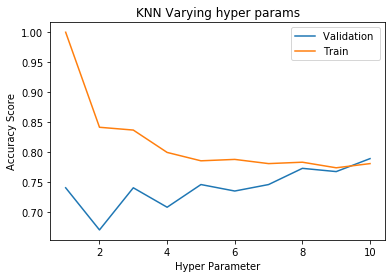

In [102]:
k = np.arange(1,11)
plot_hyperparam_vs_f1score(k,cv_accuracy,train_accuracy)

In [103]:
#getting the optimal k
optimal_k_KNN = k[cv_accuracy.index(max(cv_accuracy))]
acc_knn = max(cv_accuracy)
print(optimal_k_KNN,acc_knn)

10 0.7891891891891892


In [104]:
#retrain on full data
knn = KNeighborsClassifier(n_neighbors=optimal_k_KNN)
    
#Fit the model
knn.fit(X,Y)
    
#Compute accuracy on the training set
pred = knn.predict(test_data)

In [122]:

def mapp(x):
      if x == 1:
        return 'Y'
      else:
        return 'N'
mapped_pred = np.arange(len(pred)).astype('str')
i = 0
while (i < len(pred)):
    mapped_pred[i] = mapp(pred[i])
    i = i+1

In [124]:
d = {'Loan_ID ': Loan_ID , 'Loan_Status': mapped_pred}
upload_KNN = pd.DataFrame(d)
upload_KNN.to_csv("upload_KNN.csv",index=False)